Import libraries

In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.optimize as opt # Fitting
import matplotlib.pyplot as plt # plotting

Define functions for curve fitting

In [40]:
# Exponential function + constant
def fun_exp(x, a, b, c):
    return a * np.exp(b * x) + c

# Power series
def fun_pow(x, a, b):
    return a * np.power(x, -b)

Read in data as pandas.dataframes

In [41]:
ch_q = pd.read_csv('amazon_quarterly_revenue.csv')
ch_e = pd.read_csv('amazon_employees.csv')

Plot formatting

In [42]:
# Select colours for plotting
colours = ["MediumBlue", "Crimson", "DarkGreen", "SandyBrown"]
# Load figure style
plt.style.use('seaborn')


Method 1: Estimate Q4 2017 revenue from historic quarter revenue

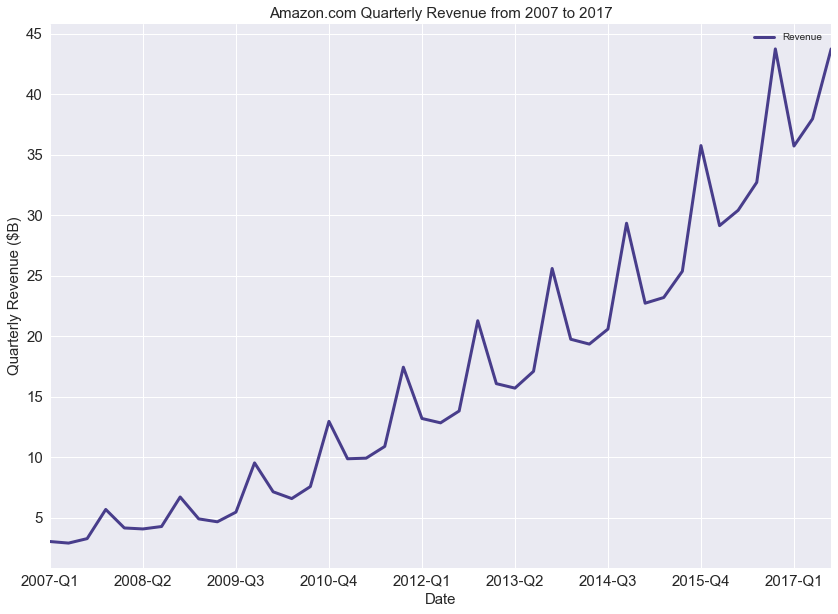

In [43]:
# Plot quarterly revenues over time
xname = ch_q['Date'].values
ch_q.plot(color="DarkSlateBlue", linewidth=3, figsize=(14,10), x=xname,
          fontsize=15, grid=True)

# Plot formatting
plt.title('Amazon.com Quarterly Revenue from 2007 to 2017', fontsize=15)
plt.ylabel('Quarterly Revenue ($B)', fontsize=15)
plt.xlabel('Date', fontsize=15)

# Save plot to file
plt.savefig('amazon_quarterly_revenue_history.pdf', bbox_inches='tight')
plt.show()



Loop over fiscal quarters and make plots of revenue against year for each quarter and print fit results

In [44]:
# Loop over fiscal quarters
for quart in range(1,5):

    date_string = "Q%d" % (quart)

    # Split consecutive quarters into individual columns for Q1, Q2 etc
    ch_temp = ch_q[ch_q.Date.str.contains(date_string)]
    ch_temp = ch_temp.reset_index(drop=True)
    ch_e[date_string] = ch_temp['Revenue']

    xvals = np.arange(0, ch_e['Year'].count(), 1)
    yvals = ch_e[date_string].values

    # No existing information for Q4 2017
    if(quart == 4):
        xvals = xvals[:-1]
        yvals = yvals[:-1]

    # Make plots of each quarter's revenue per year
    plt.plot(xvals, yvals, 'o', label=date_string, color=colours[quart-1], linewidth=3)

    # Fit distributions with exponential function
    fpars, pcov = opt.curve_fit(fun_exp,  xvals,  yvals,  p0=(3.6, 0.21, 1))

    # Calculate R squared of fit
    residuals = yvals - fun_exp(xvals, *fpars)
    sumsq_res = np.sum(residuals**2)
    sumsq_tot = np.sum((yvals-np.mean(yvals))**2)
    r_sq = 1 - (sumsq_res / sumsq_tot)

    fstring = "%s fit: y = %0.2f * exp( %0.2f * x ) + %0.2f, R^2 = %0.4f" % (date_string, fpars[0], fpars[1], fpars[2], r_sq)

    # Plot line of best fit
    xvals_fit = np.arange(xvals[0]*.9, xvals[-1]*1.1, 0.001)
    plt.plot(xvals_fit, fun_exp(xvals_fit, *fpars), '-', label=fstring, alpha=0.7, color=colours[quart-1])

    # Print results
    print "%s Fit Parameters:" % (date_string)
    print fpars
    print "\nCovariance Matrix:"
    print pcov
    print "\n######################################################\n"

# end of loop over quarters


Q1 Fit Parameters:
[ 7.23960074  0.17087015 -4.55064894]

Covariance Matrix:
[[  1.55508445e+00  -1.74973858e-02  -1.94200487e+00]
 [ -1.74973858e-02   1.99081494e-04   2.15648529e-02]
 [ -1.94200487e+00   2.15648529e-02   2.49707858e+00]]

######################################################

Q2 Fit Parameters:
[ 5.32690384  0.20235546 -2.61154021]

Covariance Matrix:
[[  7.46395454e-01  -1.21032412e-02  -1.01567512e+00]
 [ -1.21032412e-02   1.98587178e-04   1.61845971e-02]
 [ -1.01567512e+00   1.61845971e-02   1.45409484e+00]]

######################################################

Q3 Fit Parameters:
[ 4.20883746  0.23353843 -0.73831732]

Covariance Matrix:
[[  7.00803395e-01  -1.49850877e-02  -1.05090374e+00]
 [ -1.49850877e-02   3.24269608e-04   2.19915718e-02]
 [ -1.05090374e+00   2.19915718e-02   1.70649685e+00]]

######################################################

Q4 Fit Parameters:
[ 16.29207436   0.13389069 -11.21503778]

Covariance Matrix:
[[  1.24639143e+01  -5.916182

Predicted Q4 2017 revenue

In [45]:
print "Estimated Q4 2017 Revenue is %0.3f * exp(%0.3f * 10) + %0.3f = $%0.1fB\n" % \
    (fpars[0], fpars[1], fpars[2], fpars[0]*np.exp(fpars[1]*10)+fpars[2])


Estimated Q4 2017 Revenue is 16.292 * exp(0.134 * 10) + -11.215 = $50.9B



Save plots

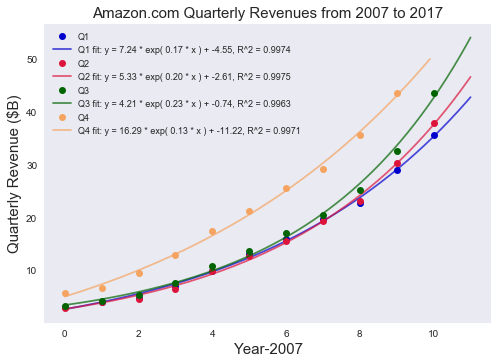

In [46]:
# Plot formatting
plt.xlabel('Year-2007', fontsize=15)
plt.ylabel('Quarterly Revenue ($B)', fontsize=15)
plt.title('Amazon.com Quarterly Revenues from 2007 to 2017', fontsize=15)
plt.legend(loc='best', fontsize=9)
plt.grid()

# Show plot and write to file
plt.savefig('amazon_fitted_quarterly_revenues.pdf')
plt.show()

Method 2: Estimate Q4 2017 revenue via expected revenue per employee

Add columns to dataframe for total revenue and Q4 revenue per employee


In [47]:
ch_e['TOTAL'] = ch_e['Q1'] + ch_e['Q2'] + ch_e['Q3'] + ch_e['Q4']
ch_e['Q4_per_Employee'] = 1e9*ch_e['Q4']/ch_e['Employees']
ch_e

,Year,Employees,Q1,Q2,Q3,Q4,TOTAL,Q4_per_Employee
0,2007,17000,3.02,2.89,3.26,5.67,14.84,333529.411765
1,2008,20700,4.14,4.06,4.26,6.70,19.16,323671.497585
2,2009,24300,4.89,4.65,5.45,9.52,24.51,391769.547325
3,2010,33700,7.13,6.57,7.56,12.95,34.21,384272.997033
4,2011,56200,9.86,9.91,10.88,17.43,48.08,310142.348754
5,2012,88400,13.19,12.83,13.81,21.27,61.10,240610.859729
6,2013,117300,16.07,15.70,17.09,25.59,74.45,218158.567775
7,2014,154100,19.74,19.34,20.58,29.33,88.99,190330.953926
8,2015,230800,22.72,23.19,25.36,35.75,107.02,154896.013865
9,2016,341400,29.13,30.40,32.71,43.74,135.98,128119.507909


Plot revenue per employee against the total number of Q4 employees

In [48]:
xvals = ch_e['Employees'].values
yvals = ch_e['Q4_per_Employee'].values
xvals = xvals[:-1]
yvals = yvals[:-1]
plt.plot(xvals, yvals, 'o', color="DarkViolet", linewidth=3)

Fit distribution with power series, omitting first 3 data points

In [49]:
fpars, pcov = opt.curve_fit(fun_pow,  xvals[3:],  yvals[3:],  p0=(5e7, 0.4))

# Calculate R squared of fit
residuals = yvals[3:] - fun_pow(xvals[3:], *fpars)
sumsq_res = np.sum(residuals**2)
sumsq_tot = np.sum((yvals[3:]-np.mean(yvals[3:]))**2)
r_sq = 1 - (sumsq_res / sumsq_tot)

fstring = "Fit: y = %0.2E * x^(-%0.4f), R^2 = %0.4f" % (fpars[0], fpars[1], r_sq)

# Plot line of best fit
xvals_fit = np.arange(xvals[3]*.9, xvals[-1]*1.1, 1)
plt.plot(xvals_fit, fun_pow(xvals_fit, *fpars), '-', label=fstring, alpha=0.7, color="DarkViolet")


Print fit results

In [50]:
print "\n######################################################\n"
print "Q4 Revenue per Employee Fit Parameters:"
print fpars
print "\nCovariance Matrix:"
print pcov
print "\n######################################################\n"


######################################################

Q4 Revenue per Employee Fit Parameters:
[  5.27030692e+07   4.71349927e-01]

Covariance Matrix:
[[  2.98837709e+13   5.07172027e+04]
 [  5.07172027e+04   8.63994367e-05]]

######################################################



Print estimated Q4 2017 revenue

In [51]:
print "Estimated Q4 2017 Revenue is 541900 * (%0.2E * 541900^(-%0.4f)) = $%0.1fB" % \
    (fpars[0], fpars[1], 541900*(fpars[0]*np.power(541900,-fpars[1]))/1e9)


Estimated Q4 2017 Revenue is 541900 * (5.27E+07 * 541900^(-0.4713)) = $56.6B


display plot and write to file                                                                                                             

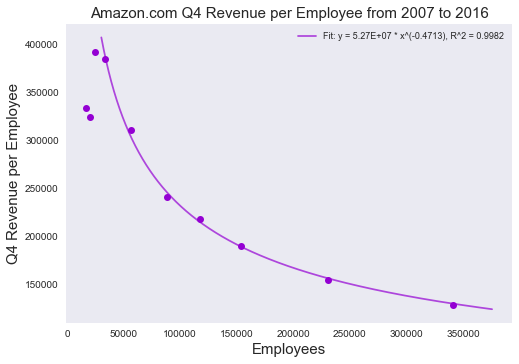

In [52]:
# Plot formatting                                                                                                                            
plt.xlabel('Employees', fontsize=15)
plt.ylabel('Q4 Revenue per Employee', fontsize=15)
plt.title("Amazon.com Q4 Revenue per Employee from 2007 to 2016", fontsize=15)
plt.legend(loc='best', fontsize=9)
plt.grid()

plt.savefig('amazon_fitted_revenue_per_employee.pdf')
plt.show()

Load report

In [53]:
from IPython.display import IFrame
IFrame("./John_Beddow_Dataffirm_report.pdf", width=1000, height=500)